# Here is an example of using DeepWave for GeoFWI

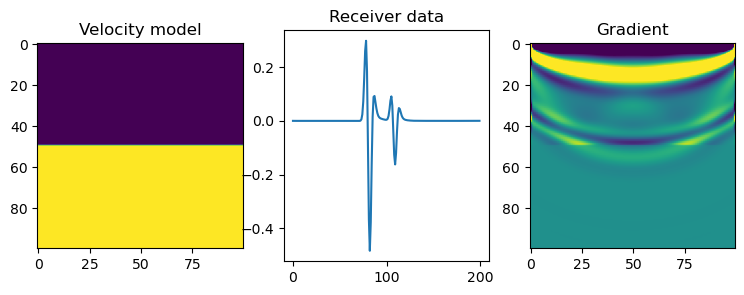

In [1]:
import torch
import geofwi.deepwave as deepwave
import matplotlib.pyplot as plt

v = 1500 * torch.ones(100, 100)
v[50:] = 2000
v.requires_grad_()

out = deepwave.scalar(
    v, grid_spacing=4, dt=0.004,
    source_amplitudes=deepwave.wavelets.ricker(25, 200, 0.004, 0.06).reshape(1, 1, -1),
    source_locations=torch.tensor([[[0, 0]]]),
    receiver_locations=torch.tensor([[[0, 99]]])
)

(out[-1]**2).sum().backward()

_, ax = plt.subplots(1, 3, figsize=(9, 3))
ax[0].imshow(v.detach())
ax[0].set_title("Velocity model")
ax[1].plot(out[-1].detach().flatten())
ax[1].set_title("Receiver data")
ax[2].imshow(v.grad.detach(), vmin=-1e-5, vmax=1e-5)
ax[2].set_title("Gradient")
plt.show()